**Feature Engineering** == Cleaning / Pre-processing your columns! 

In [1]:
import pandas as pd
df = pd.read_csv('../train.csv')

1. train.csv
    - training subsample
    - testing subsample
2. test.csv

In [2]:
X = df[['Pclass', 'Sex', 'Embarked', 'Age']]
#matrix

In [3]:
y = df['Survived']
#vector

In [4]:
X.shape, y.shape

((891, 4), (891,))

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 4), (223, 4), (668,), (223,))

---

In [8]:
# X_train, y_train

In [9]:
from sklearn.linear_model import LogisticRegression
m = LogisticRegression()

### Now we need Feature Engineering!

In [10]:
X_train.dtypes

Pclass        int64
Sex          object
Embarked     object
Age         float64
dtype: object

In [11]:
X_train.isna().sum()

Pclass        0
Sex           0
Embarked      2
Age         132
dtype: int64

### 1. Missing values! (Imputation)

In [12]:
X_train['Embarked'].mode()

0    S
dtype: object

In [13]:
pd.options.mode.chained_assignment = None
# X_train.dropna(subset=['Embarked'], inplace=True)
X_train['Embarked'].fillna(X_train['Embarked'].mode(), inplace=True)

In [14]:
X_train['Age'].fillna(value=X_train['Age'].median(), inplace=True) #maybe there's a smarter way to do this!

In [15]:
# import numpy as np
# pd.Series([1.0, 2.0, np.nan, 4.0, 5.0, np.nan, 7.0]).fillna(method='bfill')
# pd.Series([1.0, 2.0, np.nan, 4.0, 5.0, np.nan, 7.0]).fillna(method='ffill')
# pd.Series([1.0, 2.0, np.nan, 4.0, 5.0, np.nan, 7.0]).interpolate(method='linear')

custom filling -- > df.iterrows()

In [16]:
X_train.isna().sum() #Great!!

Pclass      0
Sex         0
Embarked    2
Age         0
dtype: int64

#### 2. Deal with non-numeric values!

1. pd.factorize()

In [17]:
X_train['Sex_Number'] = pd.factorize(X_train['Sex'], sort=True)[0]

2. One-hot-encoding (pd.get_dummies())

In [18]:
# X_train['Embarked']

In [19]:
embarked_cols = pd.get_dummies(X_train['Embarked'])

In [20]:
X_train_merged = pd.merge(left=X_train, right=embarked_cols, how='inner', on=X_train.index).set_index('key_0')

In [21]:
X_train_final = X_train_merged.drop(['Sex', 'Embarked', 'S'], axis=1)

In [22]:
m.fit(X_train_final, y_train)

/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
m.score(X_train_final, y_train)

0.7964071856287425

In [25]:
# statsmodels

In [26]:
##### m.coef_

array([[-0.84869751, -0.01813126, -2.34228848,  0.61997379,  0.31885095]])

In [27]:
X_train_final.columns

Index(['Pclass', 'Age', 'Sex_Number', 'C', 'Q'], dtype='object')

In [29]:
# m.score(X_test, y_test)

### Wrap all feature-engineering changes into a single-function!

In [31]:
def feature_engineer(df):

    #1. 
    df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)

    #2. 
    df['Age'].fillna(value=df['Age'].median(), inplace=True) #maybe there's a smarter way to do this!

    #3.
    df['Sex_Number'] = pd.factorize(df['Sex'], sort=True)[0]

    #4. 
    embarked_cols = pd.get_dummies(df['Embarked'])

    #5. 
    df_merged = pd.merge(left=df, right=embarked_cols, how='inner', on=df.index).set_index('key_0')

    #6. 
    df_final = df_merged.drop(['Sex', 'Embarked', 'S'], axis=1)

    return df_final

In [39]:
X_test_final = feature_engineer(X_test)

In [40]:
m.predict(X_test_final)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0])

In [41]:
m.score(X_test_final, y_test)

0.7847533632286996

### 1. We should try to split our data set into training and testing sub-samples as early as we can.
   - but, this is flexible -- e.g. you can dropna's from the entire dataset before filling.

### 2. We need to feature engineer our testing data in the same way that we feature-engineered our training data.
   - otherwise our model will be confused! (i.e. error)
   - writing a function is a nice way to do this.

### 3. Feature Engineering includes any pre-processing techniques, such as:
   - imputation, dropping missing values
   - converting strings / non-numeric values into numeric values
   - other things: binning, scaling, combining features

    
### 4. Ideally, your testing score is about the same as your training score
   - this means your model has generalized well and learned useful insights from the data without overfitting!!!
   - overfitting is when training score >>> testing score

---

## Feature Engineering continued: 

### Lets pick up where Paul dropped off! We're continuing to look at visualisation and pre-processing

#### Visualisation
* Correlation matrix
* Pairplot matrix
* LogReg feature coefficients

In [1]:
import pandas as pd

df = pd.read_csv('train.csv')

In [71]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,223.500,0.000,2.000,20.125,0.000,0.000,7.910
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
y = df['Survived']
X = df.drop('Survived', axis=1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [8]:
Xandy = X_train.copy()
Xandy['Survived'] = y_train

---

#### Correlation matrix

In [75]:
corr_matrix = X_train.corr()

In [55]:
#pd.set_option('precision',3)

##### Correlation matrix for x data
* Are there features which I may need to drop, because they are 'paired'

In [10]:
import seaborn as sns

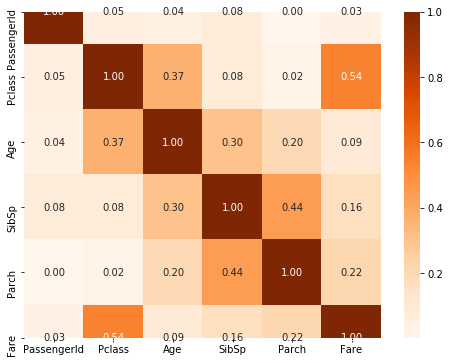

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix.abs(), cmap='Oranges', annot=True, fmt='.2f')

##### Correlation matrix for x&y data
* Which features correlate well with survival rate

In [59]:
X_train.shape

(668, 12)

In [60]:
y_train.shape

(668,)

In [ ]:
pd.options.mode.chained_assignment=None 
#this hides warnings from jupyter

In [77]:
Xandy.shape

(668, 12)

#### Correlation of x and y data - how well do my x features predict my y

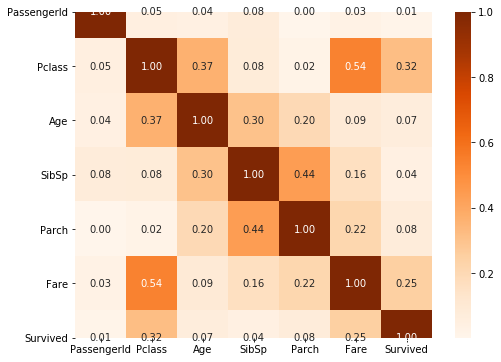

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(Xandy.corr().abs(), cmap='Oranges', annot=True, fmt='.2f')

C:\Users\tomga\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\tomga\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


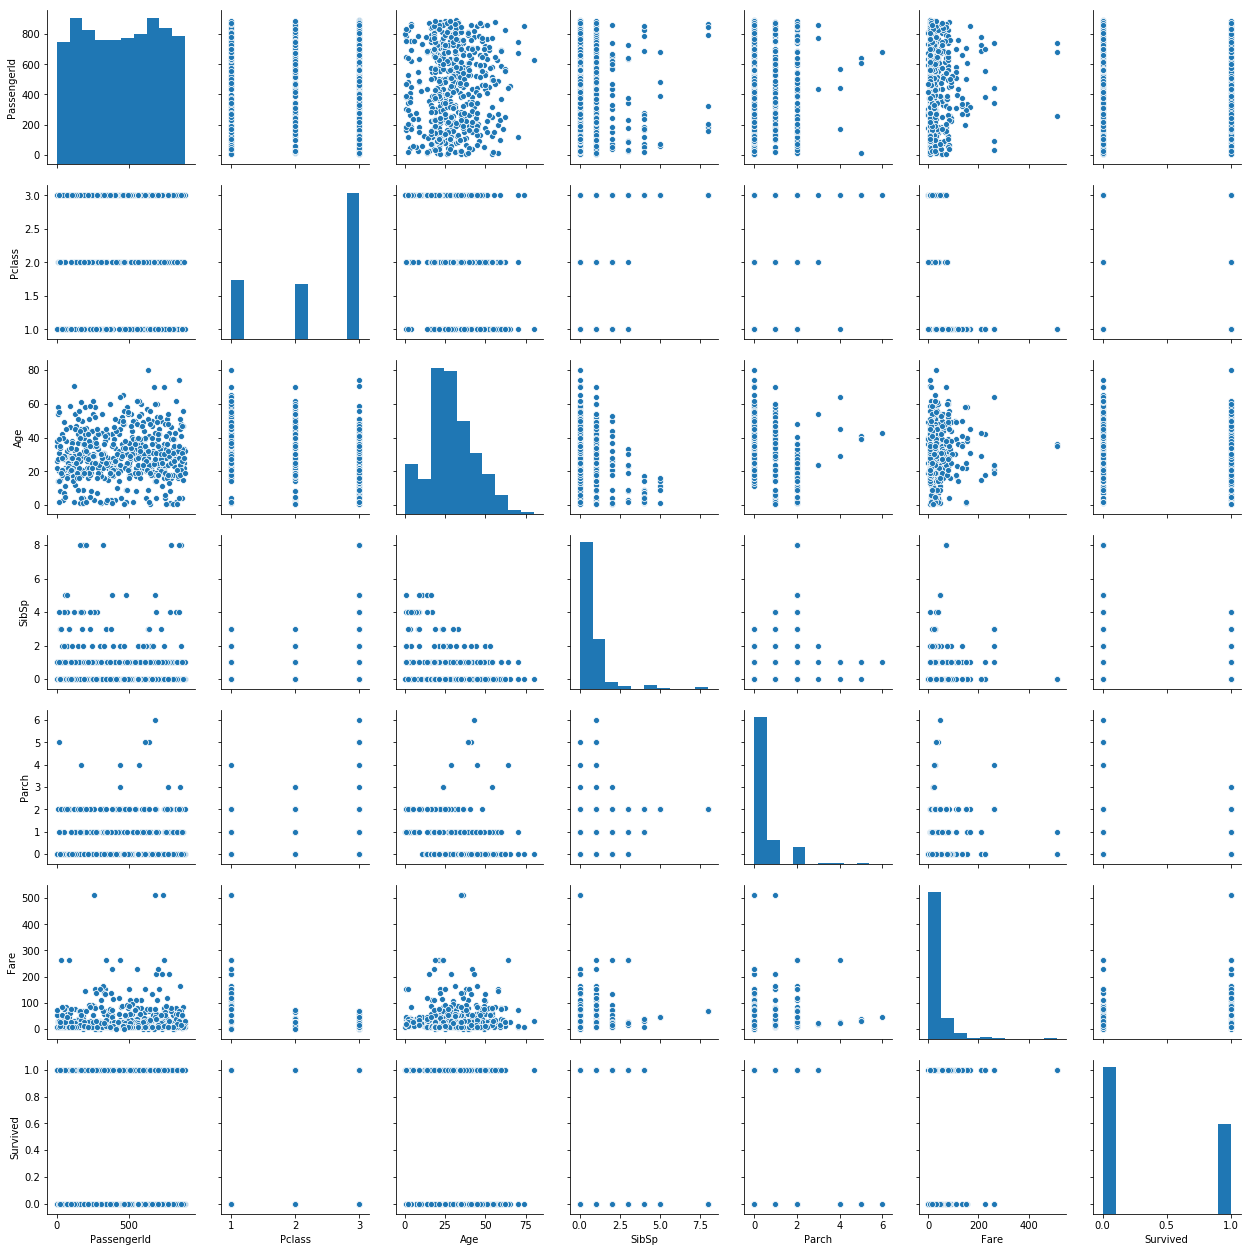

In [12]:
sns.pairplot(Xandy)

C:\Users\tomga\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\tomga\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\tomga\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\tomga\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


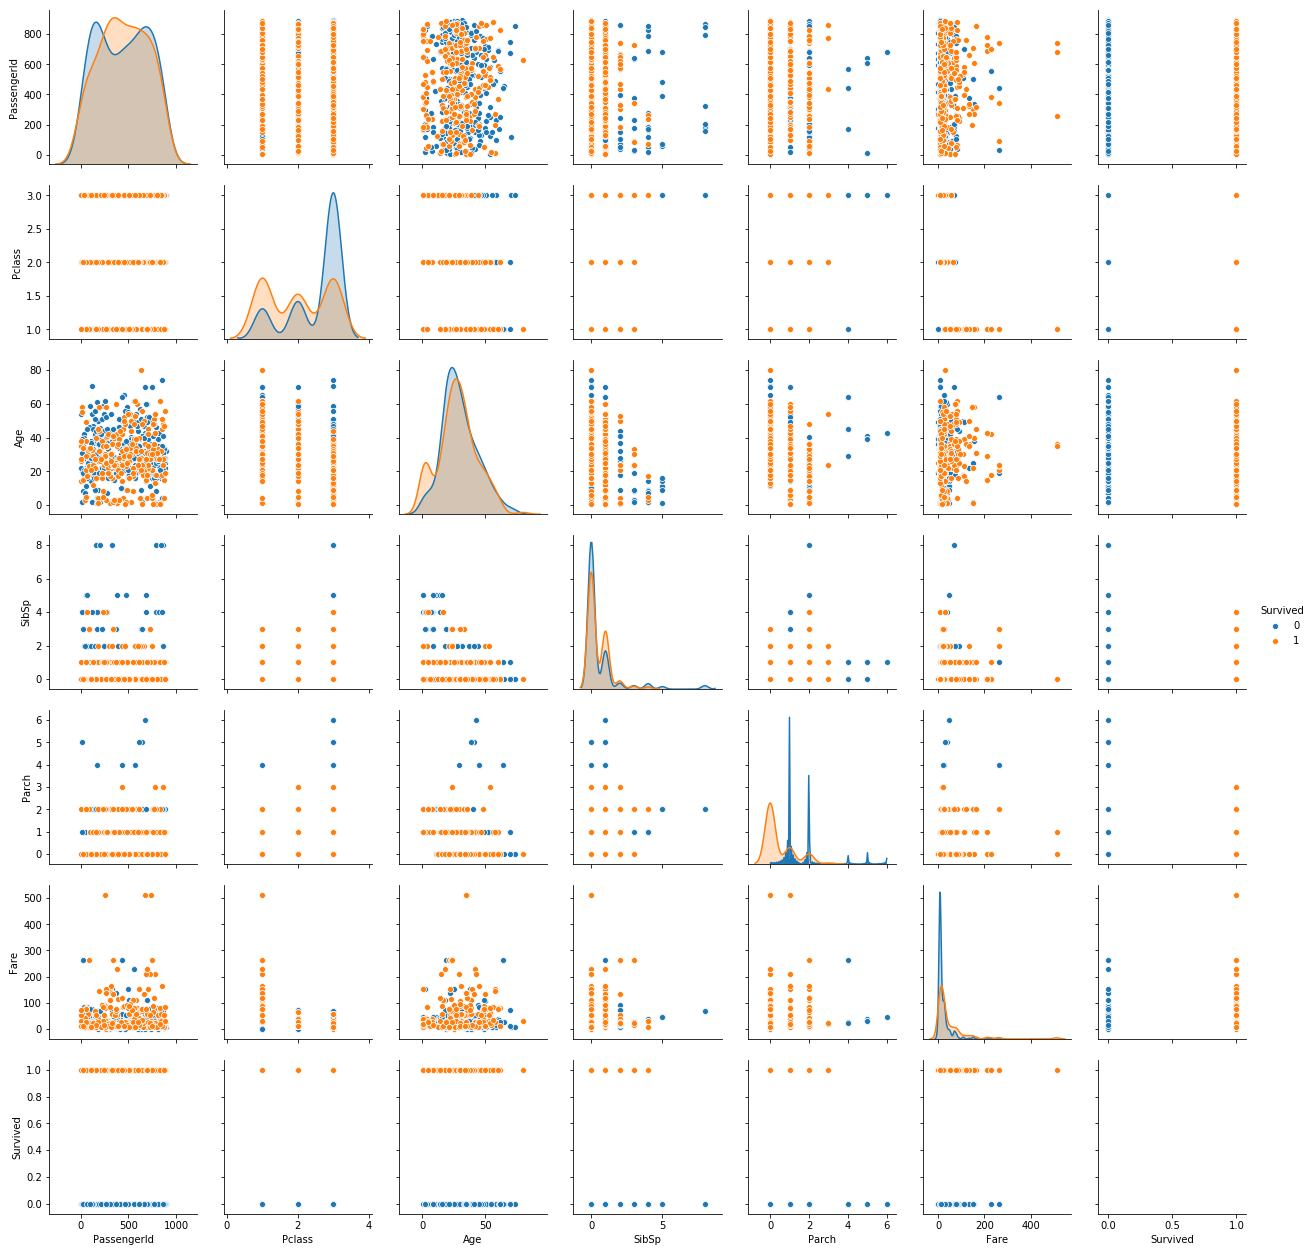

In [11]:
sns.pairplot(Xandy, hue='Survived')

#### Preprocessing
* Use linear interpolation instead of ffill / bfill
* .map() on unique values instead of factorize - alternatively look at LabelEncoder
* use StandardScaler or MinMaxScaler to mormalise your data
    * Standard Scaler scales the data so the mean = 0 and the standard deviation = 1
    * MinMaxScaler resets all values between 0 and 1
* use pd.cut or pd.qcut to bin continuous data
    * cut splits the data into equal sized ranges (equal width bins)
    * qcut splits the data into equal sized pools (equal number of data points)

In [100]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [103]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 298 to 102
Data columns (total 11 columns):
PassengerId    668 non-null int64
Pclass         668 non-null int64
Name           668 non-null object
Sex            668 non-null object
Age            536 non-null float64
SibSp          668 non-null int64
Parch          668 non-null int64
Ticket         668 non-null object
Fare           668 non-null float64
Cabin          149 non-null object
Embarked       666 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 62.6+ KB


In [105]:
mms = MinMaxScaler()
#normalize your data - divide everything by the largest number in the series
#all numbers are scaled to between zero and one

In [ ]:
X_train['mms_SibSp'] = mms.fit_transform(X_train['SibSp'].values.reshape(-1,1))
#alternatively use the parameter X_train[['SibSp']]

In [115]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,mms_SibSp
count,668.000,668.000,536.000,668.000,668.000,668.000,668.000
mean,447.451,2.334,29.421,0.554,0.373,32.179,0.069
std,258.038,0.824,14.526,1.185,0.796,51.604,0.148
min,1.000,1.000,0.420,0.000,0.000,0.000,0.000
25%,221.750,2.000,20.750,0.000,0.000,7.925,0.000
50%,452.500,3.000,28.000,0.000,0.000,14.400,0.000
75%,673.500,3.000,38.000,1.000,0.000,30.500,0.125
max,891.000,3.000,80.000,8.000,6.000,512.329,1.000


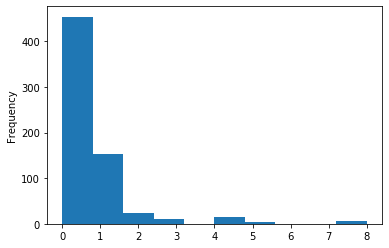

In [117]:
X_train['SibSp'].plot.hist()

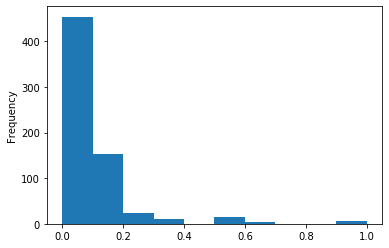

In [118]:
X_train['mms_SibSp'].plot.hist()

In [121]:
#StandardScaler demeans your data - mean becomes zero, stdev = 1
ssc = StandardScaler()
X_train['ssc_SibSp'] = ssc.fit_transform(X_train['SibSp'].values.reshape(-1,1))

In [122]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,mms_SibSp,ssc_SibSp
count,668.000,668.000,536.000,668.000,668.000,668.000,668.000,6.680e+02
mean,447.451,2.334,29.421,0.554,0.373,32.179,0.069,3.191e-17
std,258.038,0.824,14.526,1.185,0.796,51.604,0.148,1.001e+00
min,1.000,1.000,0.420,0.000,0.000,0.000,0.000,-4.677e-01
25%,221.750,2.000,20.750,0.000,0.000,7.925,0.000,-4.677e-01
50%,452.500,3.000,28.000,0.000,0.000,14.400,0.000,-4.677e-01
75%,673.500,3.000,38.000,1.000,0.000,30.500,0.125,3.767e-01
max,891.000,3.000,80.000,8.000,6.000,512.329,1.000,6.287e+00


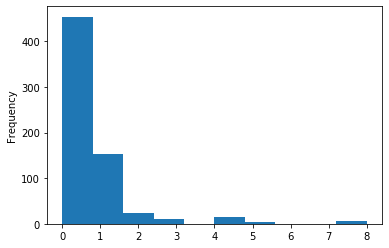

In [123]:
X_train['SibSp'].plot.hist()

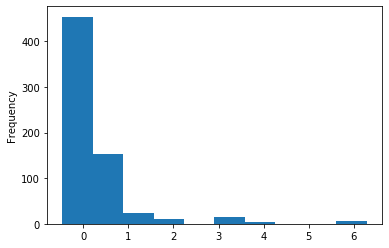

In [124]:
X_train['ssc_SibSp'].plot.hist()

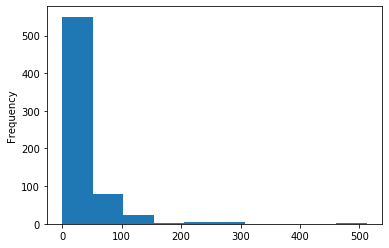

In [125]:
X_train['Fare'].plot.hist()

#### Binning of data

* Converting continuous data into categorical data

* pd.cut - creates bins of equal width
* pd.qcut - creates bins of equal size

In [132]:
X_train['Fare_cut'] = pd.cut(X_train['Fare'], bins=4)

In [153]:
X_train['Fare_Qcut'] = pd.qcut(X_train['Fare'],4)

In [154]:
y = pd.Series(y_train)

In [155]:
X_train['Fare_cut'].unique()

[(-0.512, 128.082], (128.082, 256.165], (256.165, 384.247], (384.247, 512.329]]
Categories (4, interval[float64]): [(-0.512, 128.082] < (128.082, 256.165] < (256.165, 384.247] < (384.247, 512.329]]

In [156]:
X_train['Fare_Qcut'].unique()

[(14.4, 30.5], (-0.001, 7.925], (30.5, 512.329], (7.925, 14.4]]
Categories (4, interval[float64]): [(-0.001, 7.925] < (7.925, 14.4] < (14.4, 30.5] < (30.5, 512.329]]

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [158]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [160]:
X_train['Age'] = X_train['Age'].interpolate(method='linear')

In [166]:
X_train['Age'] = X_train['Age'].fillna(method='bfill')

In [169]:
X_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [18]:
map_dictionary = {'male': 0, 'female': 1}

In [22]:
X_train['binary_gender'] = X_train['Sex'].map(map_dictionary) #map turns an old value into a new one

C:\Users\tomga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
